# Week 8: Visualizing Data 

In this notebook we use the `matplotlib` python library to visualize data. Matplotlib is one of the standard visualization packages which is accessible directly in pandas and also as its own library. For more advanced visualization options, you can look at the `seaborne` package.

We will be using the dataset that we worked with last week, the combined comment sections of two Reddit posts. Although you are encouraged to use the files that you made last week, I have also provided the pre-made files to ensure everyone is able to start in the same place.

This week, we will make several basic types of chart and show how they are each useful for different types of questions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Load your data files

<div class="alert alert-info">

**Exercise 0.1:** Read the CSV files from last week into four dataframes.
</div>

In [2]:
# pandas does all the work for us

mammoths_df = ???
remote_df = ???

# make sure to load the words as the index
mammoth_counts_df = ???
remote_counts_df = ???

In [3]:
# checking that we got the same thing as before
mammoths_df.head()

,body,created_at,id,parent,score,post,has_emoji,clean_body,sentiment
0,when you say it like that - gimme 2,2023-02-01 07:42:00,j6r1s1s,t1_j6qxv18,6,10py29t,False,"['when', 'you', 'say', 'it', 'like', 'that', '...",0.3612
1,Mammork?\n\nI would that make them hammoths?,2023-02-01 10:18:59,j6rd2o8,t1_j6qxv18,3,10py29t,False,"['mammork', 'i', 'would', 'that', 'make', 'the...",0.0000
2,Mmmmmmmm mammoth pork,2023-02-01 06:52:37,j6qxv18,t1_j6obhxv,22,10py29t,False,"['mmmmmmmm', 'mammoth', 'pork']",0.0000
3,It’ll just be made from pressed pork.,2023-01-31 19:16:08,j6obhxv,t1_j6notr0,68,10py29t,False,"['itll', 'just', 'be', 'made', 'from', 'presse...",0.0000
4,11 years before they’re extinct again,2023-02-01 06:51:58,j6qxt2e,t1_j6notr0,7,10py29t,False,"['11', 'years', 'before', 'theyre', 'extinct',...",0.0000


In [4]:
# checking the other df as well
mammoth_counts_df.head()

,count,frequency
word,,
mammoth,287,0.025378
year,128,0.011318
elephant,110,0.009727
like,102,0.009019
back,97,0.008577


## Line Charts

As we observed, (and expected), a few words make up the vast majority of the corpus for both comment sections. This relationship is called `Zipf's Law`. We will see how well it holds in our two comment sections by plotting the ranks of the various words against their frequencies.

We will also use line charts to demonstrate matplotlib basics.

<div class="alert alert-info">

**Exercise 1.1:** Create a line chart showing the rank of each word by frequency plotted against the frequency for the mammoth post.
</div>

In [5]:
# first we compute the ranks

mammoth_counts_df['rank'] = mammoth_counts_df['frequency'].rank(ascending=False, method='first')
remote_counts_df['rank'] = remote_counts_df['frequency'].rank(ascending=False, method='first')

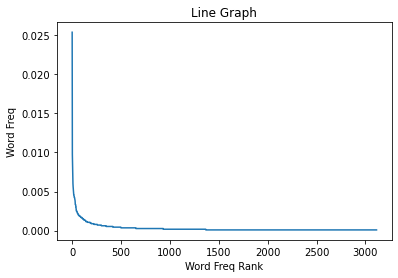

In [6]:

# For line charts, start with a plt.plot()
plt.plot(mammoth_counts_df['rank'], mammoth_counts_df['frequency'])

# You can add formatting with plt.thingtoformat
plt.title('Line Graph')
plt.xlabel('Word Freq Rank')
plt.ylabel('Word Freq')

# Then print the graph using plt.show()
plt.show()

<div class="alert alert-info">

**Exercise 1.2:** Create a line chart showing the rank of each word by frequency plotted against the frequency for both posts on one plot.
</div>

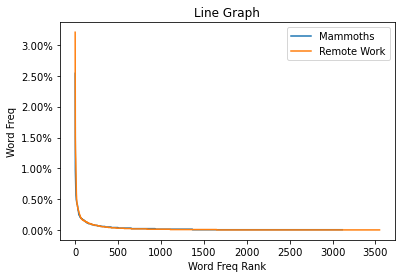

In [7]:
# lets you set the axis to percent
import matplotlib.ticker as mtick

# If we want multiple lines on the same plot, just call both plotting functions before calling plt.show()

# For line charts, start with a plt.plot()
plt.plot(mammoth_counts_df['rank'], mammoth_counts_df['frequency'],label='Mammoths')
plt.plot(remote_counts_df['rank'], remote_counts_df['frequency'],label='Remote Work')

# You can add formatting with plt.thingtoformat
plt.title('Line Graph')
plt.xlabel('Word Freq Rank')
plt.ylabel('Word Freq')

# formats the axis as a percent
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

# turns on the legend (if you have labels in the plot call above)
plt.legend()

# Then print the graph using plt.show()
plt.show()

These charts show the general pattern we expect, but are pretty lacking in detail because there is so much change in the first few values and so little in the last 3200. This suggests we should use a log on one of the axes.

<div class="alert alert-info">

**Exercise 1.3:** Create two line charts showing the rank of each word by frequency plotted against the frequency for both posts. For the first one, log the yscale, and for the second log the xscale.
</div>

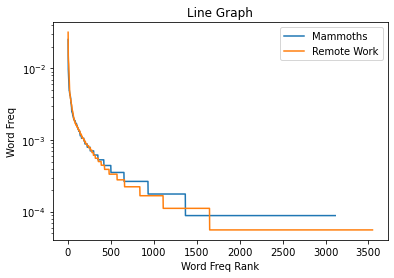

In [8]:
# lets you set the axis to percent
import matplotlib.ticker as mtick

# If we want multiple lines on the same plot, just call both plotting functions before calling plt.show()

# For line charts, start with a plt.plot()
plt.plot(???)
plt.plot(???)

# You can add formatting with plt.thingtoformat
# set the x and y axis labels and the title here:

#YOUR CODE HERE

# formats the axis as a percent
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

# This sets the y axis scale to logarithmic
plt.yscale("log")

# turns on the legend (if you have labels in the plot call above)
plt.legend()

# Then print the graph using plt.show()
plt.show()


This graph isn't much better. Perhaps we should have tried the other axis:

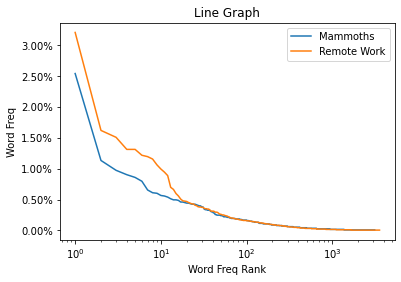

In [9]:
# lets you set the axis to percent
import matplotlib.ticker as mtick

# If we want multiple lines on the same plot, just call both plotting functions before calling plt.show()

# For line charts, start with a plt.plot()
plt.plot(mammoth_counts_df['rank'], mammoth_counts_df['frequency'],label='Mammoths')
plt.plot(remote_counts_df['rank'], remote_counts_df['frequency'],label='Remote Work')

# You can add formatting with plt.thingtoformat
plt.title('Line Graph')
plt.xlabel('Word Freq Rank')
plt.ylabel('Word Freq')
# formats the axis as a percent
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

# This sets the x axis scale to logarithmic
plt.xscale(???)

# turns on the legend (if you have labels in the plot call above)
plt.legend()

# Then print the graph using plt.show()
plt.show()


Still not great, although we can see something interesting going on where it seems the top remote work words are more common than the top mammoths words. The best approach here is probably to log BOTH axes. 

<div class="alert alert-info">

**Exercise 1.4:** Create a line chart showing the rank of each word by frequency plotted against the frequency for both posts. Log both axes.
</div>

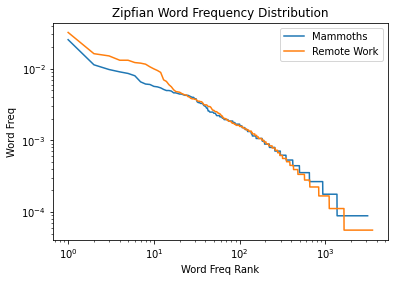

In [10]:
# For loglog charts, start with a plt.loglog()
plt.loglog(mammoth_counts_df['rank'], mammoth_counts_df['frequency'],label='Mammoths')
plt.loglog(remote_counts_df['rank'], remote_counts_df['frequency'],label='Remote Work')

# You can add formatting with plt.thingtoformat
plt.title('Zipfian Word Frequency Distribution')
plt.xlabel('Word Freq Rank')
plt.ylabel('Word Freq')

# turns on the legend (if you have labels in the plot call above)
plt.legend()

# Then print the graph using plt.show()
plt.show()


Now that we're happy with this plot, we can save it!

<div class="alert alert-info">

**Exercise 1.5:** Recreate the same plot as above and save it.
</div>

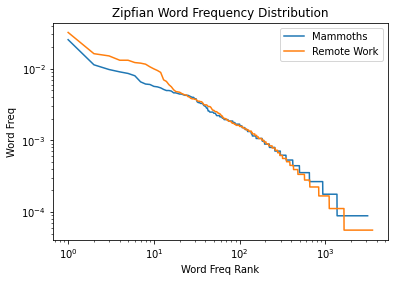

In [11]:

# YOUR CODE HERE

# You must save BEFORE calling plt.show()
# Just put the name you want for the image in the parens
plt.savefig('loglog')

# Then print the graph using plt.show()
plt.show()


## Scatter plots

Conceptually, scatter plots are very similar to line plots. Helpfully, they also use nearly identical syntax. We had computed estimated sentiment for all of the posts. Do longer posts tend to have stronger sentiment than shorter ones? (If it did, would we believe it, or was our sentiment analysis faulty?) Let's see what the data looks like.

<div class="alert alert-info">

**Exercise 2.1:** Create a scatter plot comparing post length and interpreted sentiment.
</div>

In [12]:
# find out how long each comment is:

mammoths_df['len'] = mammoths_df['clean_body'].apply(len)
remote_df['len'] = remote_df['clean_body'].apply(len)

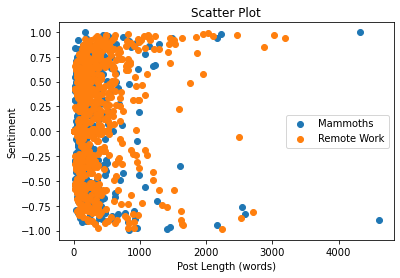

In [13]:
# For scatter charts, start with a plt.scatter()
plt.scatter(mammoths_df['len'], mammoths_df['sentiment'],label='Mammoths')
plt.scatter(remote_df['len'], remote_df['sentiment'],label='Remote Work')

# You can add formatting with plt.thingtoformat
plt.title(???)
plt.xlabel(???)
plt.ylabel(???)

# turn on the legend (if you have labels in the plot call above)
???

# Then print the graph using plt.show()
plt.show()


Pandas allows other ways to access the same data. You can pass the dataframe to the `data` argument of the plotting function:

<div class="alert alert-info">

**Exercise 2.2:** Create a scatter plot comparing post length and interpreted sentiment.
    
</div>

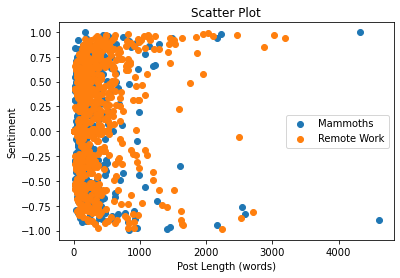

In [14]:
# For scatter charts, start with a plt.scatter()
plt.scatter('len', 'sentiment', data=mammoths_df, label='Mammoths')
plt.scatter('len', 'sentiment', data=remote_df, label='Remote Work')

# You can add formatting with plt.thingtoformat
plt.title('Scatter Plot')
plt.xlabel('Post Length (words)')
plt.ylabel('Sentiment')

# turns on the legend (if you have labels in the plot call above)
plt.legend()

# Then print the graph using plt.show()
plt.show()


<div class="alert alert-info">

**Exercise 2.3:** Create two side by side scatter plots comparing post length and interpreted sentiment.
</div>

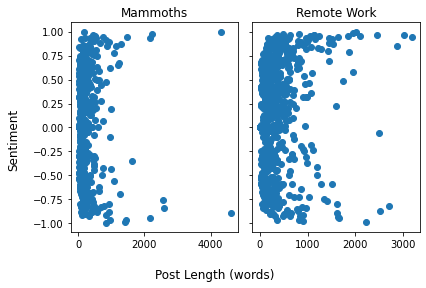

In [39]:
# Sometimes you might want side by side plots rather than stacking them
# To do this, start with plt.subplots()

# this returns a figure, and an array of axes objects
# each axis object correponds to a single subplot
fig, axs = plt.subplots(1,2, sharey=True)

# now we use the axs to plot rather than plt.plot()
axs[0].scatter('len', 'sentiment', data=mammoths_df, label='Mammoths')
axs[1].scatter('len', 'sentiment', data=remote_df, label='Remote Work')

# we also use the axs objects to set the other features
# for an axis we use set_title() instead of just title()
axs[0].set_title('Mammoths')
axs[1].set_title('Remote Work')

# to put labels on the whole figure, we use the fig
fig.supxlabel('Post Length (words)')
fig.supylabel('Sentiment')

# when using subplots, always call tight_layout to prevent overlapping details
plt.tight_layout()

# You must save BEFORE calling plt.show()
# Just put the name you want for the image in the parens
plt.savefig('scatter')

# Then print the graph using plt.show()
plt.show()


It looks like there may be a tendency for longer posts to be recorded as having more extreme sentiment, but nothing we can say conclusively just from this chart.

## Bar Charts

Next let's take an example comment and use a bar chart to compare the frequency of appearance of each word in the comment for each post. I picked an example and put it in the cell below, but noticed a problem: the whole list has been stored as a string!

<div class="alert alert-info">

**Exercise 3.1:** Write a function to fix the `clean_body` data so that it is a list of strings rather than a string of a list. 
</div>

In [43]:
# this is a nice short example post, but its one giant string!

remote_df['clean_body'][815]

"['more', 'money', 'less', 'commute']"

In [41]:
# this function turns my string of a list back into a real list
# you need to strip off the []
# then replace the quotes (') with nothing
# then split on the commas

def parse_clean_body(text):
    return ???

In [42]:
# much better 

example_words = parse_clean_body(remote_df['clean_body'][815])

example_words

['more', ' money', ' less', ' commute']

<div class="alert alert-info">

**Exercise 3.2:** Create a dictionary with the words `money` and `commute` as keys, and as values have lists with two entires, one for the frequency in each post dataset.
</div>

In [46]:
# more and less are stopwords so they won't be in our dataframes

# for the barchart, its easiest to have a dictionary
freqs = {'mammoths':[0.0,0.0],
         'remote work':[0.0,0.0]}

# store the frequencies of each word within each post in the dictionary
freqs['remote work'][0] = ???
freqs['remote work'][1] = ???

freqs['mammoths'][0] = ???

# this one isn't defined so I set it to nearly zero
# truly zero wouldn't show on the chart, so I preferred this
freqs['mammoths'][1] = 0.00001

freqs

{'mammoths': [0.0008842514811212, 1e-05],
 'remote work': [0.0023990180763222, 0.0069738897567507]}

<div class="alert alert-info">

**Exercise 3.3:** Create a grouped bar plot, with frequencies grouped by word.
</div>

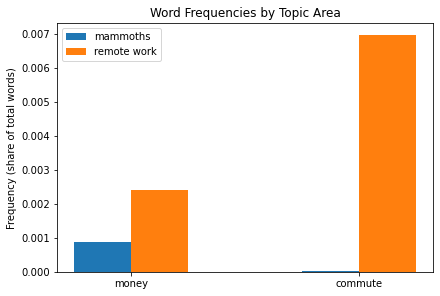

In [47]:
# this code is mostly taken from the matplotlib examples  https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#grouped-bar-chart-with-labels
# you can get lots of good examples in the examples library

words = ("money", "commute")

x = np.arange(len(words))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

# they use subplots in a tricky way to plot things in grouped bars
fig, ax = plt.subplots(constrained_layout=True)

for attribute, measurement in freqs.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency (share of total words)')
ax.set_title('Word Frequencies by Topic Area')
ax.set_xticks(x + width/2, words)
ax.legend(loc='upper left')

plt.show()

## Word Clouds

Another way to show relative word frequencies is with a word cloud. Python has a package for that, which takes raw text, or preprocessed words and counts like we have.

<div class="alert alert-info">

**Exercise 4.1:** Convert the counts dfs to dictionaries.
</div>

In [19]:
%%capture
!pip install wordcloud

In [20]:
from wordcloud import WordCloud

In [21]:
# we need to convert the df to a dict
# the default method stores the numbers as floats, which breaks the wordcloud

mammoth_counts_dict = {}

for k,v in mammoth_counts_df.to_dict()['count'].items():
    mammoth_counts_dict[str(k)] = v

In [22]:
remote_counts_dict = {}

for k,v in remote_counts_df.to_dict()['count'].items():
    remote_counts_dict[str(k)] = v

<div class="alert alert-info">

**Exercise 4.2:** Use the WordCloud.generate_from_frequencies() method to create a word cloud.
</div>

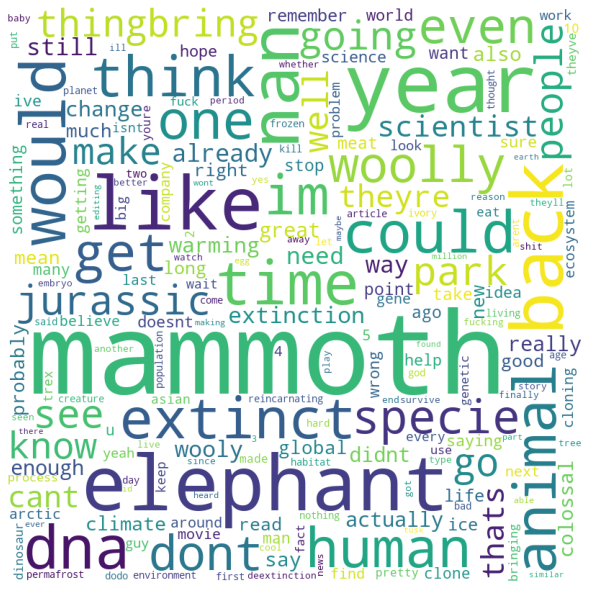

In [23]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(mammoth_counts_dict)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

<div class="alert alert-info">

**Exercise 4.2:** Use the WordCloud.generate_from_frequencies() method to create a word cloud for the other post.
</div>

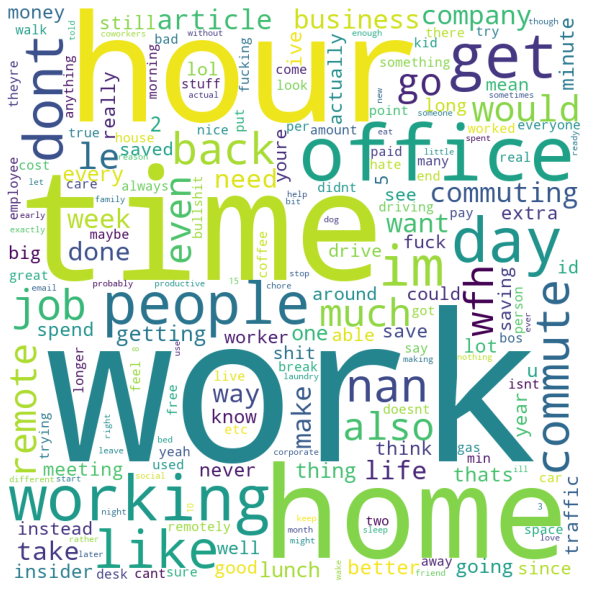

In [24]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(remote_counts_dict)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Boxplots

Next let's look at the sentiment data. Are the comments on one of the posts generally more positive than the other? I have actually used violin plots here to make things easier to see.

<div class="alert alert-info">

**Exercise 5.1:** Use violinplot to make a side-by-side violin plot of the distribution of sentiment scores for each post.
</div>

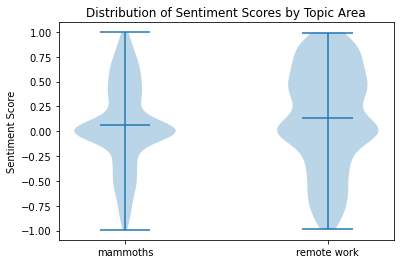

In [25]:
# the biggest difference here is that you give it a list of the series that you want to plot
plt.violinplot([mammoths_df['sentiment'],remote_df['sentiment']], showmeans=True)
# then pass the labels using xticks
plt.xticks([1,2],labels=['mammoths','remote work'])

plt.ylabel('Sentiment Score')
plt.title('Distribution of Sentiment Scores by Topic Area')
plt.show()

## T-test

As the last thing we do, let's perform a t-test to compare the two distributions more rigorously. Do they have means which differ in a statistically significant way?

<div class="alert alert-info">

**Exercise 6.1:** Use scipy.stats to perform a t-test comparing the means of the two sentiment score distributions.
</div>

In [50]:
import scipy.stats as stats

stats.ttest_ind(remote_df['sentiment'],mammoths_df['sentiment'])

Ttest_indResult(statistic=3.296624185699131, pvalue=0.000998357890376527)

Since the t-statistic is large, we can reject the hypothesis that the two distributions have the same mean. However, we may have violated a key assumption here that the data is roughly normally distrbuted, since it is clear that neither one is. If you want to use a statistical test, you'll need to choose the right one for your data, but it probably exists in scipy.stats.

## Homework:

Find a chart about social science data from either a major news outlet (e.g. BBC), or a data journalism site (e.g. 538). Recreate that chart as best as you can using matplotlib. (538 is nice because they sometimes share their data if you look at the bottom of the page.)

In [ ]:
# YOUR CODE HERE